# Problem Statement:

The Goal is to predict whether Customer will loose or Churn or not, churn is the target col with binary classification.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
telecom = pd.read_csv('telecom_churn.csv')

In [5]:
df = pd.DataFrame(telecom)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

- 21 cols
- 7043 rows

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- 1 float, 2 int and 18 objects variables.
- dataset will be separated with numeric & objects cols

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The dataset do not have missing value.

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') # Converted to numeric 

In [11]:
df.loc[df['TotalCharges'].isna()==True] # check the rows which have NaN in the TotalCharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df.drop(['customerID'],axis=1, inplace=True) # customerID col is dropped which is of least imp

In [13]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen']) # Converting Seniorcitizen into cat var

In [14]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

In [15]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


- Monthlycharges shows big diff between max & 75th Percentile.
- Totalcharges also shows big diff bwteen max & 75th Percentile.
- Std is high for TotalCharges & Mean is also > then 50th percentile
- As per above obs it seems data is skewed, spreaded.

In [16]:
objects_ds.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [17]:
df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

- Target col - churn class is not balance which is balanced later by upsampling technique.

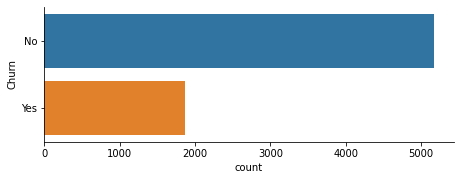

In [18]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

- Yes Class is not balanced with No Class.

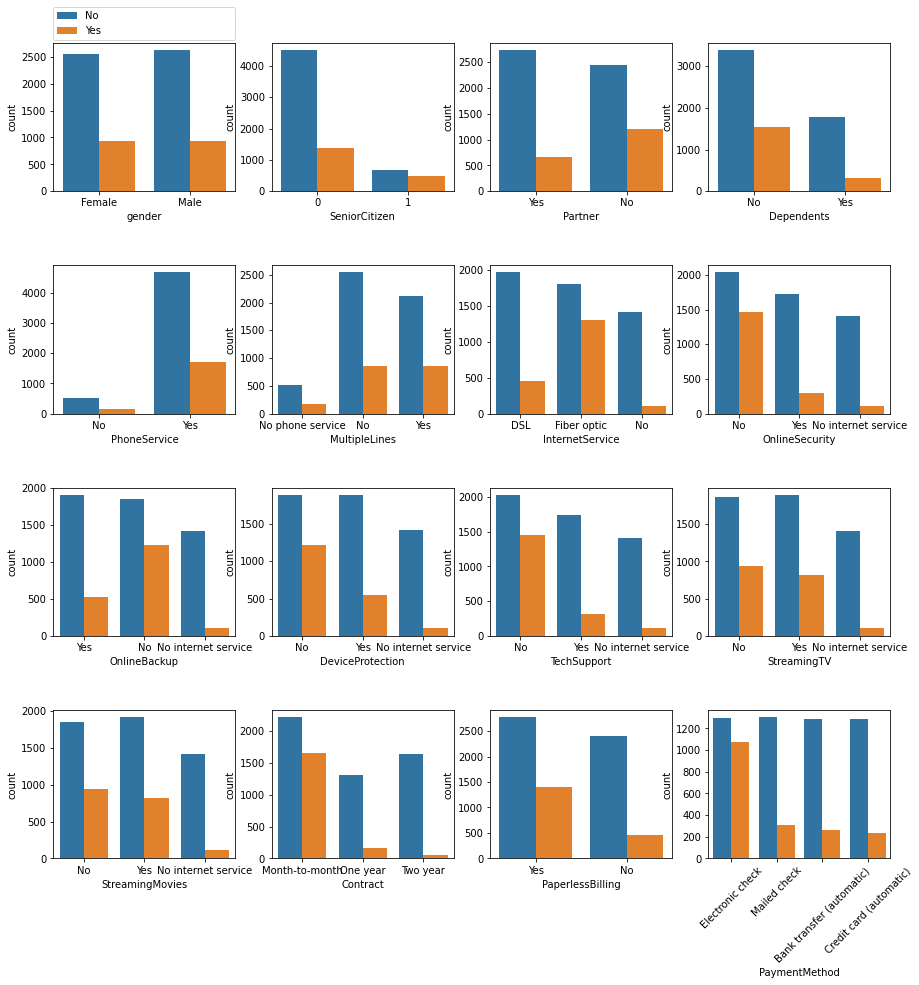

In [19]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

-  its an count plot which shows no of count of unique class in object variables .

In [20]:
# categorical variable encoding
cat_vars_list = objects_ds.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
corr = df.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375556,-0.195525


- Churn doesnt show corr with almost any variables.
- Tenure has corr with TotalCharges & contract
- Monthlycharges & totalcharges shows some corr

<AxesSubplot:>

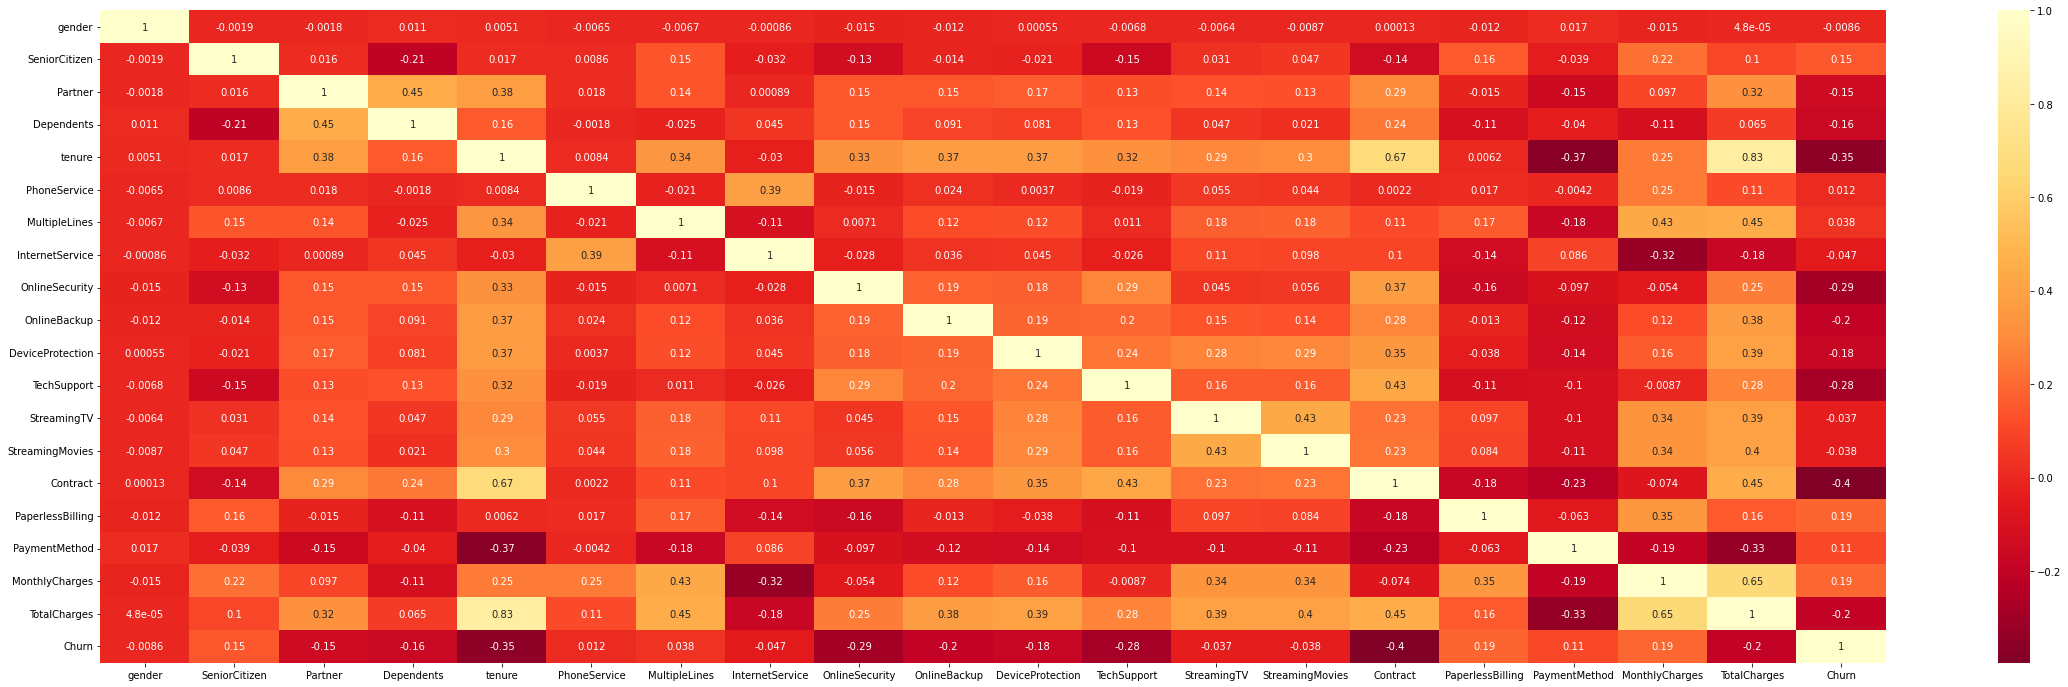

In [23]:
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- Churn doesnt show corr with almost any variables.
- Tenure has corr with TotalCharges & contract
- Monthlycharges & totalcharges shows some corr

In [24]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

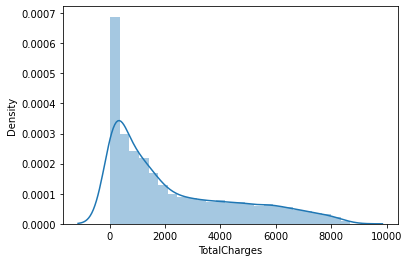

In [25]:
sns.distplot(df['TotalCharges'])

In [26]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

-  as the Totalcharges data is not normal distributed so median is used to remove nan values

In [27]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [31]:
vif_calc()

    VIF Factor          features
0     1.954594            gender
1     1.372968     SeniorCitizen
2     2.821545           Partner
3     1.964165        Dependents
4    14.743717            tenure
5    15.185873      PhoneService
6     2.757141     MultipleLines
7     4.382575   InternetService
8     2.259590    OnlineSecurity
9     2.460279      OnlineBackup
10    2.634106  DeviceProtection
11    2.394247       TechSupport
12    3.240595       StreamingTV
13    3.262158   StreamingMovies
14    4.176811          Contract
15    2.888549  PaperlessBilling
16    3.109949     PaymentMethod
17   22.308166    MonthlyCharges
18   14.242253      TotalCharges
19    1.861734             Churn


- Monthlycharges, TotalCharges shows high VIF values which indicates having multicollinearity among them.
- rest others are cat variables where multicollinearity is of least signinificant.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

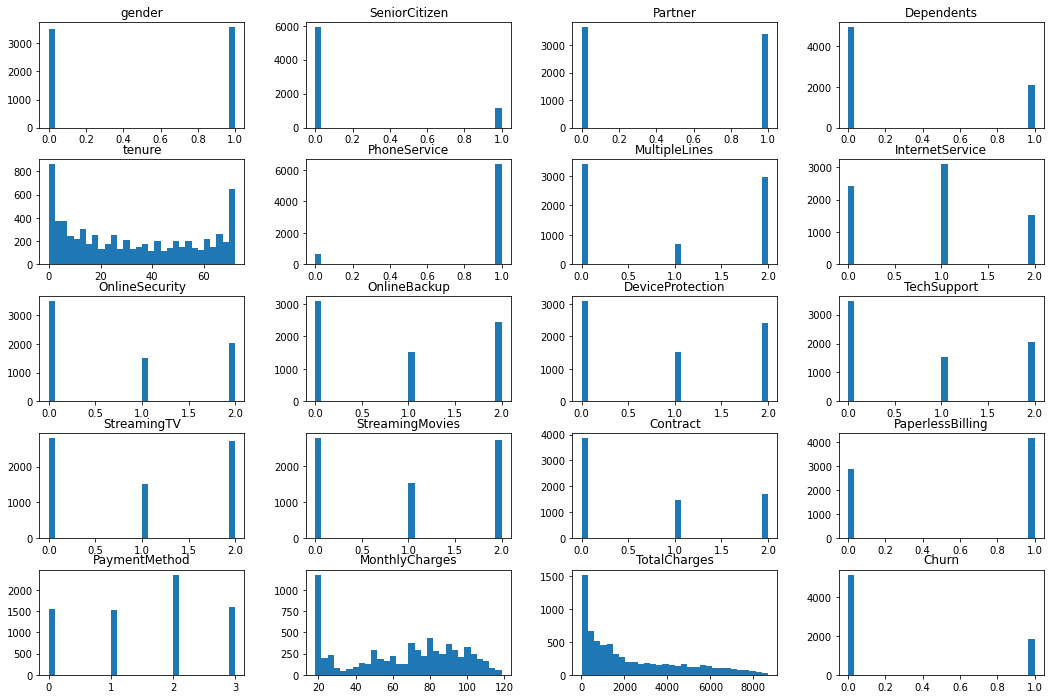

In [32]:
df.hist(grid=False, figsize=(18,12), bins=30)

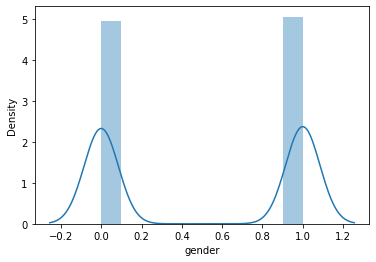

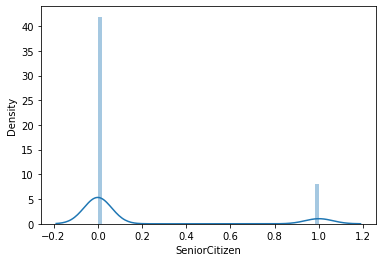

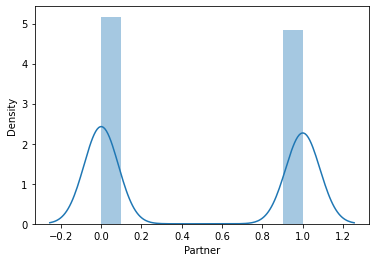

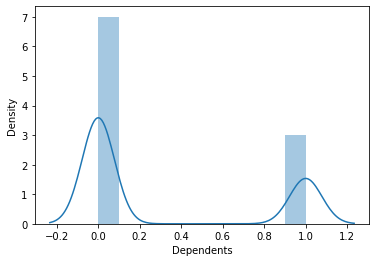

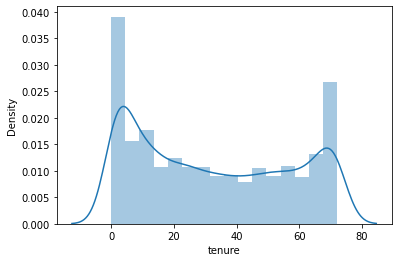

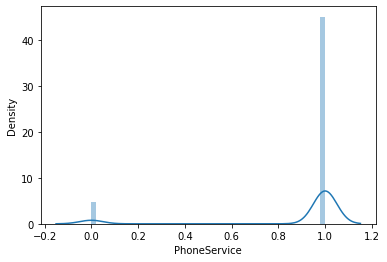

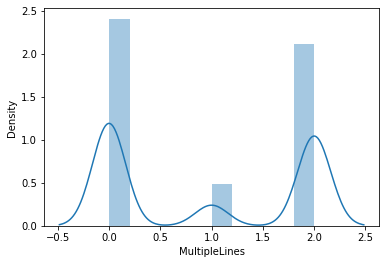

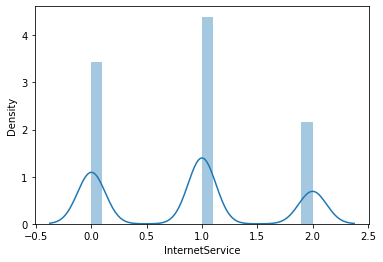

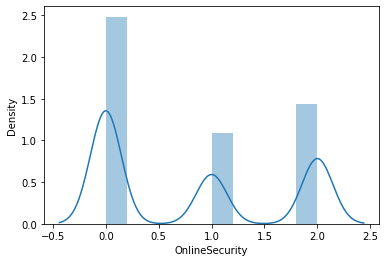

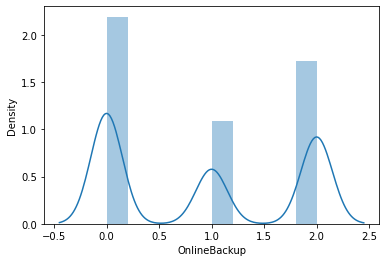

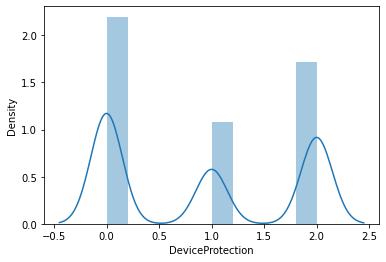

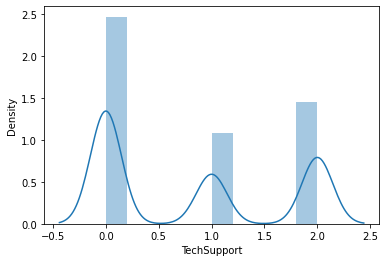

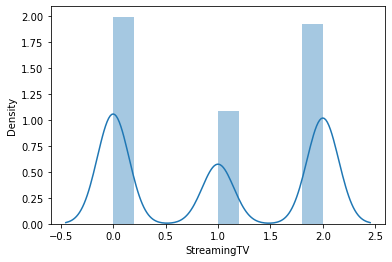

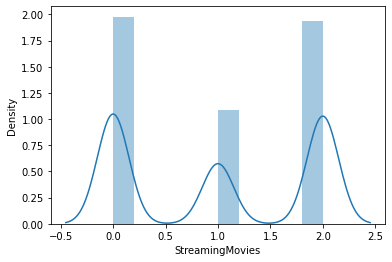

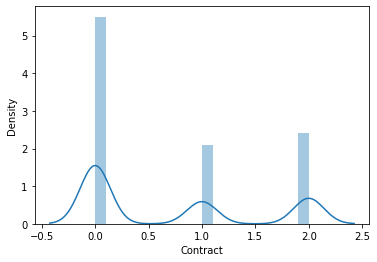

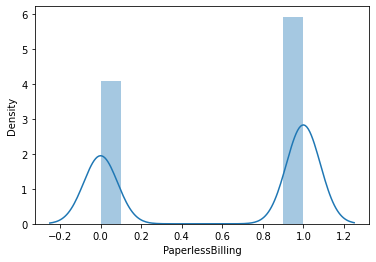

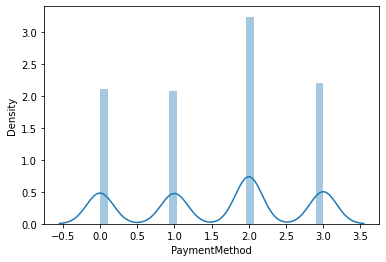

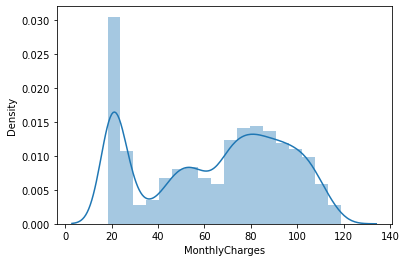

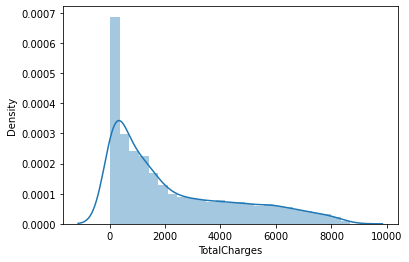

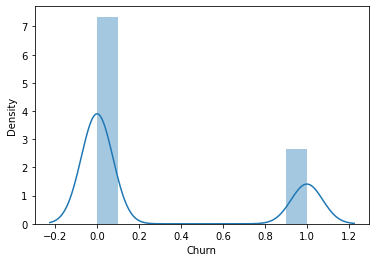

In [33]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:>

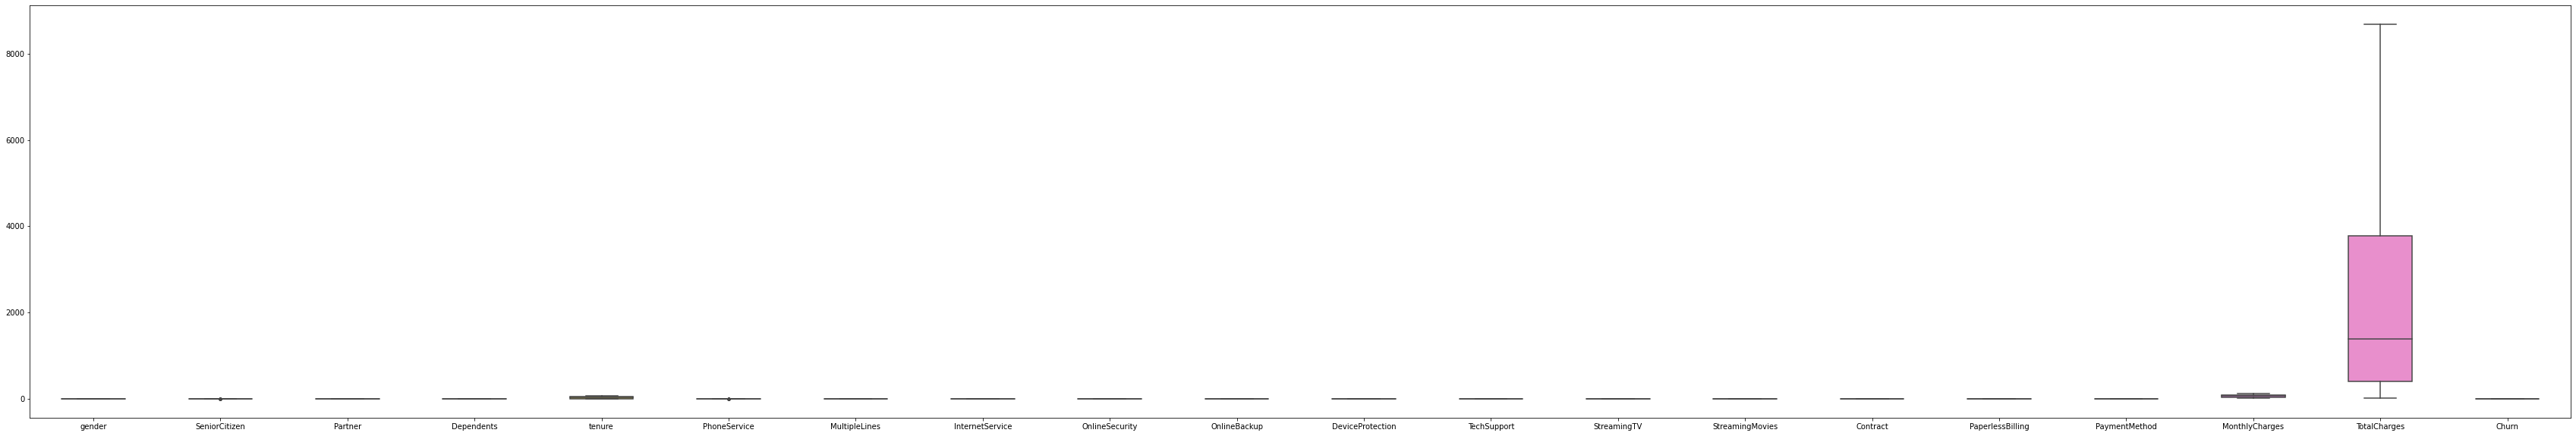

In [34]:
fig, ax =plt.subplots(figsize=(60,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

In [35]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.309838
Churn               1.063031
dtype: float64

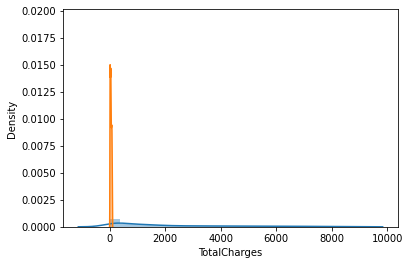

In [36]:
sns.distplot(df['TotalCharges'])
import numpy as np
df['TotalCharges']=np.sqrt(df['TotalCharges'])
sns.distplot(df['TotalCharges'])
df.skew()

In [37]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [38]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

0 - No & 1 - yes

In [39]:
from sklearn.utils import resample

In [40]:
x = pd.concat([x, y], axis=1)

In [41]:
Ano = x[x.Churn==0]
Ays = x[x.Churn==1]

In [42]:
# upsample minority
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results

In [43]:
upsampled = pd.concat([Ano, dia_upsampled])

In [44]:
upsampled.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [45]:
upsampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,5.463515,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,43.468379,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,42.903963,0
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,44.152010,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,17.375270,0


In [46]:
x=upsampled.drop("Churn",axis=1)
y=upsampled["Churn"]

In [47]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,5.463515
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,43.468379
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,42.903963
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,44.152010
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,17.375270


In [48]:
y.head()

0    0
1    0
3    0
6    0
7    0
Name: Churn, dtype: int32

In [49]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [50]:
x=upsampled.drop("Churn",axis=1)
y=upsampled["Churn"]

In [51]:
x.shape

(10348, 19)

In [52]:
y.shape

(10348,)

In [53]:
y.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-0.99729781, -0.484912  ,  1.11696498, ...,  0.3625071 ,
        -1.31385241, -1.33887901],
       [ 1.00270951, -0.484912  , -0.89528321, ...,  1.34245053,
        -0.37051026,  0.22812891],
       [ 1.00270951, -0.484912  , -0.89528321, ..., -1.59737977,
        -0.88047197,  0.204857  ],
       ...,
       [ 1.00270951,  2.06222983,  1.11696498, ..., -1.59737977,
        -1.08236808, -0.23958876],
       [ 1.00270951, -0.484912  , -0.89528321, ...,  0.3625071 ,
         1.15763441, -0.38377516],
       [-0.99729781, -0.484912  , -0.89528321, ...,  0.3625071 ,
         0.30479741, -1.20387244]])

In [56]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

84.74377745241581 at random_state 0
85.53440702781845 at random_state 1
86.23718887262079 at random_state 2
85.09516837481699 at random_state 3
84.53879941434846 at random_state 4
83.86530014641288 at random_state 5
86.26647144948755 at random_state 6
85.12445095168376 at random_state 7
85.47584187408492 at random_state 8
87.26207906295754 at random_state 9
84.80234260614934 at random_state 10
85.3294289897511 at random_state 11
85.62225475841873 at random_state 12
85.76866764275256 at random_state 13
85.44655929721814 at random_state 14
84.9194729136164 at random_state 15
85.65153733528551 at random_state 16
85.50512445095168 at random_state 17
86.00292825768668 at random_state 18
86.1493411420205 at random_state 19
84.33382137628112 at random_state 20
85.47584187408492 at random_state 21
85.79795021961932 at random_state 22
85.44655929721814 at random_state 23
86.12005856515374 at random_state 24
85.68081991215227 at random_state 25
86.67642752562226 at random_state 26
85.85651537335

In [57]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.881159420289855  on Random_state  188


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 188)

In [60]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


# Obs : Logistic Regression is giving 76% Accuracy

[1 1 1 ... 1 1 0]
0.7665056360708534
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1551
           1       0.75      0.79      0.77      1554

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



In [61]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.8763285024154589
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1551
           1       0.83      0.94      0.88      1554

    accuracy                           0.88      3105
   macro avg       0.88      0.88      0.88      3105
weighted avg       0.88      0.88      0.88      3105



In [62]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.8940418679549115
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1551
           1       0.86      0.94      0.90      1554

    accuracy                           0.89      3105
   macro avg       0.90      0.89      0.89      3105
weighted avg       0.90      0.89      0.89      3105



In [63]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


0.7896940418679549
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1551
           1       0.78      0.81      0.79      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [64]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.7768115942028986
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1551
           1       0.74      0.86      0.79      1554

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



# K-fold Cross CV

In [65]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [66]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [67]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.7664266851591119


In [68]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.8690558812747646


In [69]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.8972745591116155


In [70]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.7865285337031822


In [71]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.7707757253965252


# Best Model:
Knn has least diff value with Knn acc & Knn Cv Score which is 1.07 hence I use Knn as the best model

# Hyperparameter & GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [80]:
import numpy as np
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [81]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)

In [82]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

In [83]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [84]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.63607085346216


# AUC ROC Curve

In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

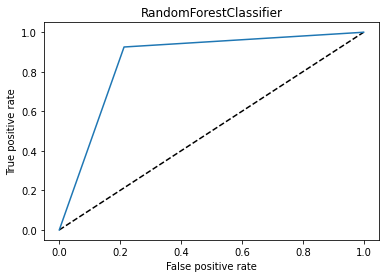

0.8562939839535585

In [86]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

In [87]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']